# KIT DATA Session 2 #
Olivier Maxwell\\
This project is built around the numpy library

**Projet maison n° 1**

- Ajoutez une colonne 'CP Ville' avec le Code postal + un espace + et le nom de la Ville.
- Ecrivez une fonction qui détermine la commune la plus proche d'un point à partir de sa latitude et sa longitude.
- Ajoutez une fonction de conversion pour pouvoir utiliser la première fonction avec un GPS (degrés, minutes, secondes).




In [46]:
#import key modules
import numpy as np
import pandas as pd
import json

#load data from the csv file
geo = pd.read_csv("correspondance-code-insee-code-postal.csv",
                   sep=';',
                   usecols=range(11),
                   index_col="Code INSEE")
geo = geo.sort_index()
geo[['Latitude', 'Longitude']] = geo["geo_point_2d"].str.extract("(.*), (.*)").astype(float)
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude
Code INSEE,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",46.153426,4.926114
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",46.009188,5.428017
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",45.960848,5.372926
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",45.996180,4.912273
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",45.749499,5.594320


In [47]:
geo.iloc[0].T

Code Postal                                                     01400
Commune                                       L'ABERGEMENT-CLEMENCIAT
Département                                                       AIN
Région                                                    RHONE-ALPES
Statut                                                 Commune simple
Altitude Moyenne                                                242.0
Superficie                                                     1565.0
Population                                                        0.8
geo_point_2d                             46.1534255214, 4.92611354223
geo_shape           {"type": "Polygon", "coordinates": [[[4.926273...
Latitude                                                    46.153426
Longitude                                                    4.926114
Name: 01001, dtype: object

In [48]:
type(geo)


pandas.core.frame.DataFrame

In [49]:
geo['CP_Ville'] = geo['Code Postal']+" "+geo['Commune']
geo.head()
type(geo)

pandas.core.frame.DataFrame

In [50]:
def closestCity(**kwargs) -> str:
    if 'lat' in kwargs:
        geo2 = kwargs['geo']  #ASk about global
        lat = kwargs['lat']
        long = kwargs['long']
        geo2['distance'] = np.sqrt((lat-geo2['Latitude'])**2 - (long-geo2['Longitude'])**2)
        return geo2.loc[geo2["distance"].idxmin()]["Commune"]
    if 'gpsCord' in kwargs:
        geo2 = kwargs['geo']
        lat = kwargs['gpsCord'].loc['lat']
        long = kwargs['gpsCord'].loc['long']
        lat = lat['deg'] + lat['mn'] / 60 + lat['sec'] / 3600
        long = long['deg'] + long['mn'] / 60 + long['sec'] / 3600
        geo2["distance"] = np.sqrt((lat-geo2["Latitude"])**2 - (long-geo2["Longitude"])**2)
        return geo.loc[geo["distance"].idxmin()]["Commune"]



In [51]:
def gps2dec(deg, mn, sec):
    return deg + mn / 60 + sec / 3600

In [52]:
lat=45.2
long=5.4
geo['Latitude'].head()
closestCity(lat= lat, long= long,geo = geo)

/Users/oliviermaxwell/PycharmProjects/TelecomParis/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


'CHAPEIRY'

In [53]:
# à partir de coordonnées GPS précises
gpsCord = [['lat', 48, 42, 52], ['long', 2, 14, 45]]
gpsCordDf = pd.DataFrame(gpsCord, columns = ['Name', 'deg','mn','sec'])
gpsCordDf = gpsCordDf.set_index('Name')
gpsCordDf.loc['lat'].loc['deg']
closestCity(gpsCord = gpsCordDf,geo = geo)
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude,CP_Ville,distance
Code INSEE,,,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",46.153426,4.926114,01400 L'ABERGEMENT-CLEMENCIAT,NaN
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",46.009188,5.428017,01640 L'ABERGEMENT-DE-VAREY,NaN
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",45.960848,5.372926,01500 AMBERIEU-EN-BUGEY,NaN
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",45.996180,4.912273,01330 AMBERIEUX-EN-DOMBES,0.528265
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",45.749499,5.594320,01300 AMBLEON,NaN


**Projet maison n° 2**

La colonne "geo_shape" comporte des chaines de catactères au format JSON. Elles représentent les formes géométriques des communes qui sont soit des polygones soit composées de plusieurs polygones.

- Utiliser la librairie Python json pour parser la colonne "geo_shape".
- Donner le décompte des valeurs accédées avec la clé "type".
- Donner le décompte des longueurs des listes accédées avec la clé "coordinates".
- Quelle commune est la plus complexe géométriquement ?
- Quelle commune est la seconde la plus complexe géométriquement ?
- Quelles sont les villes qui sont de type "Polygon" mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?
- Pour ces villes vérifier que le premier polygone contient bien le second (enclave). *Nota bene* : installer la librairie shapely, utiliser la classe Polygon de shapely.geometry. Sur Windows shapely peut nécessiter d'installer la dll "geos_c.dll" dans le répertoire "Library/bin" de votre environnement Python.


In [66]:
geo['geo_shape']


Code INSEE
01001    {"type": "Polygon", "coordinates": [[[4.926273...
01002    {"type": "Polygon", "coordinates": [[[5.430089...
01004    {"type": "Polygon", "coordinates": [[[5.386190...
01005    {"type": "Polygon", "coordinates": [[[4.895580...
01006    {"type": "Polygon", "coordinates": [[[5.614854...
                               ...                        
97613    {"type": "Polygon", "coordinates": [[[45.10168...
97614    {"type": "Polygon", "coordinates": [[[45.15401...
97615    {"type": "Polygon", "coordinates": [[[45.29645...
97616    {"type": "Polygon", "coordinates": [[[45.13226...
97617    {"type": "Polygon", "coordinates": [[[45.15256...
Name: geo_shape, Length: 36742, dtype: object

In [55]:
df_json = pd.json_normalize(geo['geo_shape'].apply(json.loads))
df_json.head()

,type,coordinates
0,Polygon,"[[[4.92627342692396, 46.1200517234555], [4.921..."
1,Polygon,"[[[5.430089291292173, 45.98275997279625], [5.4..."
2,Polygon,"[[[5.386190824025674, 45.930927620632], [5.374..."
3,Polygon,"[[[4.895580369408855, 45.97991618124606], [4.8..."
4,Polygon,"[[[5.614854625053272, 45.734638855121595], [5...."


In [56]:
geo = geo.reset_index()
df_json = pd.json_normalize(geo['geo_shape'].apply(json.loads))
geo = geo.assign(type = df_json['type'], coordinates = df_json['coordinates'])
geo = geo.set_index('Code INSEE')
geo['type'].value_counts()

Polygon         36670
MultiPolygon       72
Name: type, dtype: int64

In [57]:
geo['coordinates'].str.len().value_counts()


1    36660
2       80
3        1
4        1
Name: coordinates, dtype: int64

In [77]:
geo['coordinates'].apply(lambda x : len(x[0])).value_counts()

11     3396
12     3336
10     3186
13     3023
9      2822
       ... 
62        1
95        1
81        1
66        1
122       1
Name: coordinates, Length: 78, dtype: int64

In [58]:
geo.loc[geo['coordinates'].str.len() == 4, 'Commune']
#geo.loc['83069']['coordinates']
geo.loc[geo['coordinates'].str.len() == 3, 'Commune']

Code INSEE
27701    VAL-DE-REUIL
Name: Commune, dtype: object

In [68]:
geo.loc[(geo['type'] == 'Polygon')& (geo['coordinates'].str.len() == 2)]

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude,CP_Ville,distance,type,coordinates
Code INSEE,,,,,,,,,,,,,,,,
02232,02600,COYOLLES,AISNE,PICARDIE,Commune simple,126.0,2489.0,0.4,"49.2133089693, 3.01306173751","{""type"": ""Polygon"", ""coordinates"": [[[3.037897...",49.213309,3.013062,02600 COYOLLES,NaN,Polygon,"[[[3.037897560658703, 49.16921270775551], [3.0..."
05052,05600,EYGLIERS,HAUTES-ALPES,PROVENCE-ALPES-COTE D'AZUR,Commune simple,1615.0,2987.0,0.7,"44.6925244966, 6.66688741371","{""type"": ""Polygon"", ""coordinates"": [[[6.719912...",44.692524,6.666887,05600 EYGLIERS,NaN,Polygon,"[[[6.719912606601575, 44.70392733592357], [6.7..."
09042,09240,LA BASTIDE-DE-SEROU,ARIEGE,MIDI-PYRENEES,Chef-lieu canton,479.0,4138.0,1.0,"43.0242795037, 1.42677885373","{""type"": ""Polygon"", ""coordinates"": [[[1.423960...",43.024280,1.426779,09240 LA BASTIDE-DE-SEROU,5.630908,Polygon,"[[[1.423960819701936, 42.99550854650971], [1.4..."
22209,22650,PLOUBALAY,COTES-D'ARMOR,BRETAGNE,Chef-lieu canton,36.0,3600.0,2.7,"48.5596688192, -2.12838362694","{""type"": ""Polygon"", ""coordinates"": [[[-2.11237...",48.559669,-2.128384,22650 PLOUBALAY,NaN,Polygon,"[[[-2.11237709725211, 48.52896113651634], [-2...."
2A272,20100,SARTENE,CORSE-DU-SUD,CORSE,Sous-préfecture,190.0,20182.0,3.1,"41.5718443328, 8.93538107497","{""type"": ""Polygon"", ""coordinates"": [[[8.940487...",41.571844,8.935381,20100 SARTENE,2.503335,Polygon,"[[[8.940487655060174, 41.490088793265336], [8...."
2B049,20214,CALENZANA,HAUTE-CORSE,CORSE,Chef-lieu canton,596.0,18465.0,2.1,"42.4784267166, 8.80369225001","{""type"": ""Polygon"", ""coordinates"": [[[8.911220...",42.478427,8.803692,20214 CALENZANA,NaN,Polygon,"[[[8.911220447280732, 42.41019895400797], [8.8..."
48080,48300,LANGOGNE,LOZERE,LANGUEDOC-ROUSSILLON,Chef-lieu canton,973.0,3124.0,3.1,"44.7237405653, 3.83363110341","{""type"": ""Polygon"", ""coordinates"": [[[3.850531...",44.723741,3.833631,48300 LANGOGNE,3.661231,Polygon,"[[[3.850531831651621, 44.68745054452225], [3.8..."
67486,67920,SUNDHOUSE,BAS-RHIN,ALSACE,Commune simple,166.0,1590.0,1.5,"48.2550723499, 7.63031906582","{""type"": ""Polygon"", ""coordinates"": [[[7.594939...",48.255072,7.630319,67920 SUNDHOUSE,NaN,Polygon,"[[[7.594939251325704, 48.23228567615893], [7.5..."
68078,68420,EGUISHEIM,HAUT-RHIN,ALSACE,Commune simple,320.0,1400.0,1.6,"48.0371183049, 7.30052876111","{""type"": ""Polygon"", ""coordinates"": [[[7.281156...",48.037118,7.300529,68420 EGUISHEIM,NaN,Polygon,"[[[7.281156117554148, 48.02598189605906], [7.2..."


In [72]:
from shapely.geometry import Polygon

geo.loc[(geo['type'] == 'Polygon') & (geo['coordinates'].str.len() == 2), 'coordinates'].apply(
    lambda x: Polygon(x[1]).within(Polygon(x[0])))

Code INSEE
02232    True
05052    True
09042    True
22209    True
2A272    True
2B049    True
48080    True
67486    True
68078    True
71028    True
Name: coordinates, dtype: bool

In [74]:
geo.loc[(geo['type'] == 'Polygon') & (geo['coordinates'].str.len() == 2), 'coordinates'].apply(
    lambda x: len(x[0]) )

Code INSEE
02232    36
05052    17
09042    30
22209    22
2A272    66
2B049    44
48080    22
67486    18
68078    14
71028    16
Name: coordinates, dtype: int64

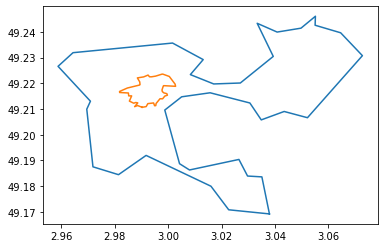

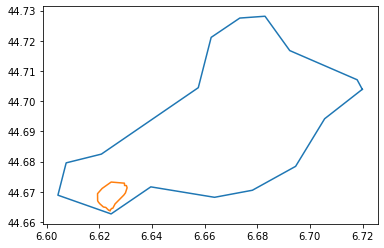

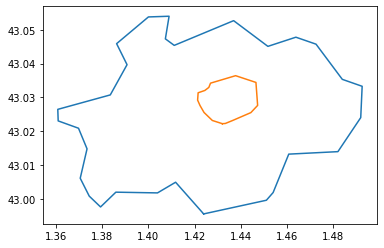

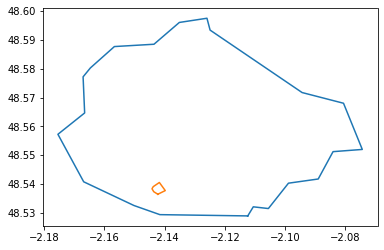

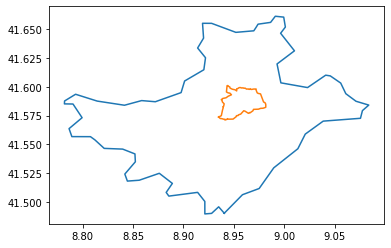

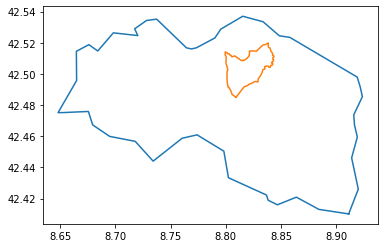

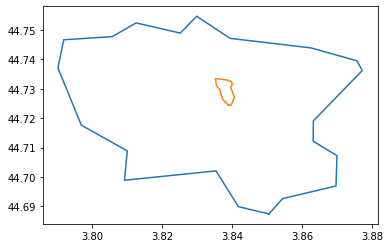

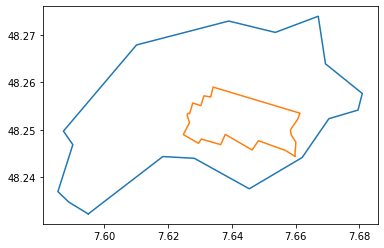

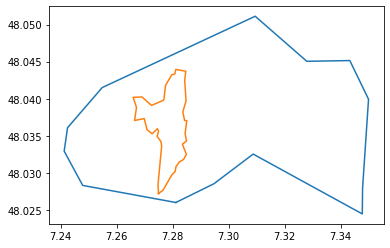

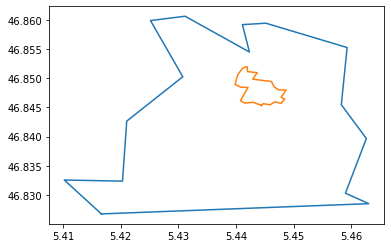

In [84]:
import matplotlib.pyplot as plt

geo2 = geo.loc[(geo['type'] == 'Polygon') & (geo['coordinates'].str.len() == 2), 'coordinates']

for listOfCoord in geo2:
    for cords in listOfCoord:
        poly = Polygon(cords)
        plt.plot(*poly.exterior.xy)
    plt.show()

In [81]:
geo.loc[(geo['type'] == 'Polygon') & (geo['coordinates'].str.len() == 2), 'coordinates']

Code INSEE
02232    [[[3.037897560658703, 49.16921270775551], [3.0...
05052    [[[6.719912606601575, 44.70392733592357], [6.7...
09042    [[[1.423960819701936, 42.99550854650971], [1.4...
22209    [[[-2.11237709725211, 48.52896113651634], [-2....
2A272    [[[8.940487655060174, 41.490088793265336], [8....
2B049    [[[8.911220447280732, 42.41019895400797], [8.8...
48080    [[[3.850531831651621, 44.68745054452225], [3.8...
67486    [[[7.594939251325704, 48.23228567615893], [7.5...
68078    [[[7.281156117554148, 48.02598189605906], [7.2...
71028    [[[5.416652515196548, 46.826781866293906], [5....
Name: coordinates, dtype: object